In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
data.shape

(1599, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no null values

In [6]:
data['quality'].nunique()

6

In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
data['quality'].replace({3:0,4:0,5:0,6:0,7:1,8:1},inplace=True)

In [9]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [10]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol have outliers

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

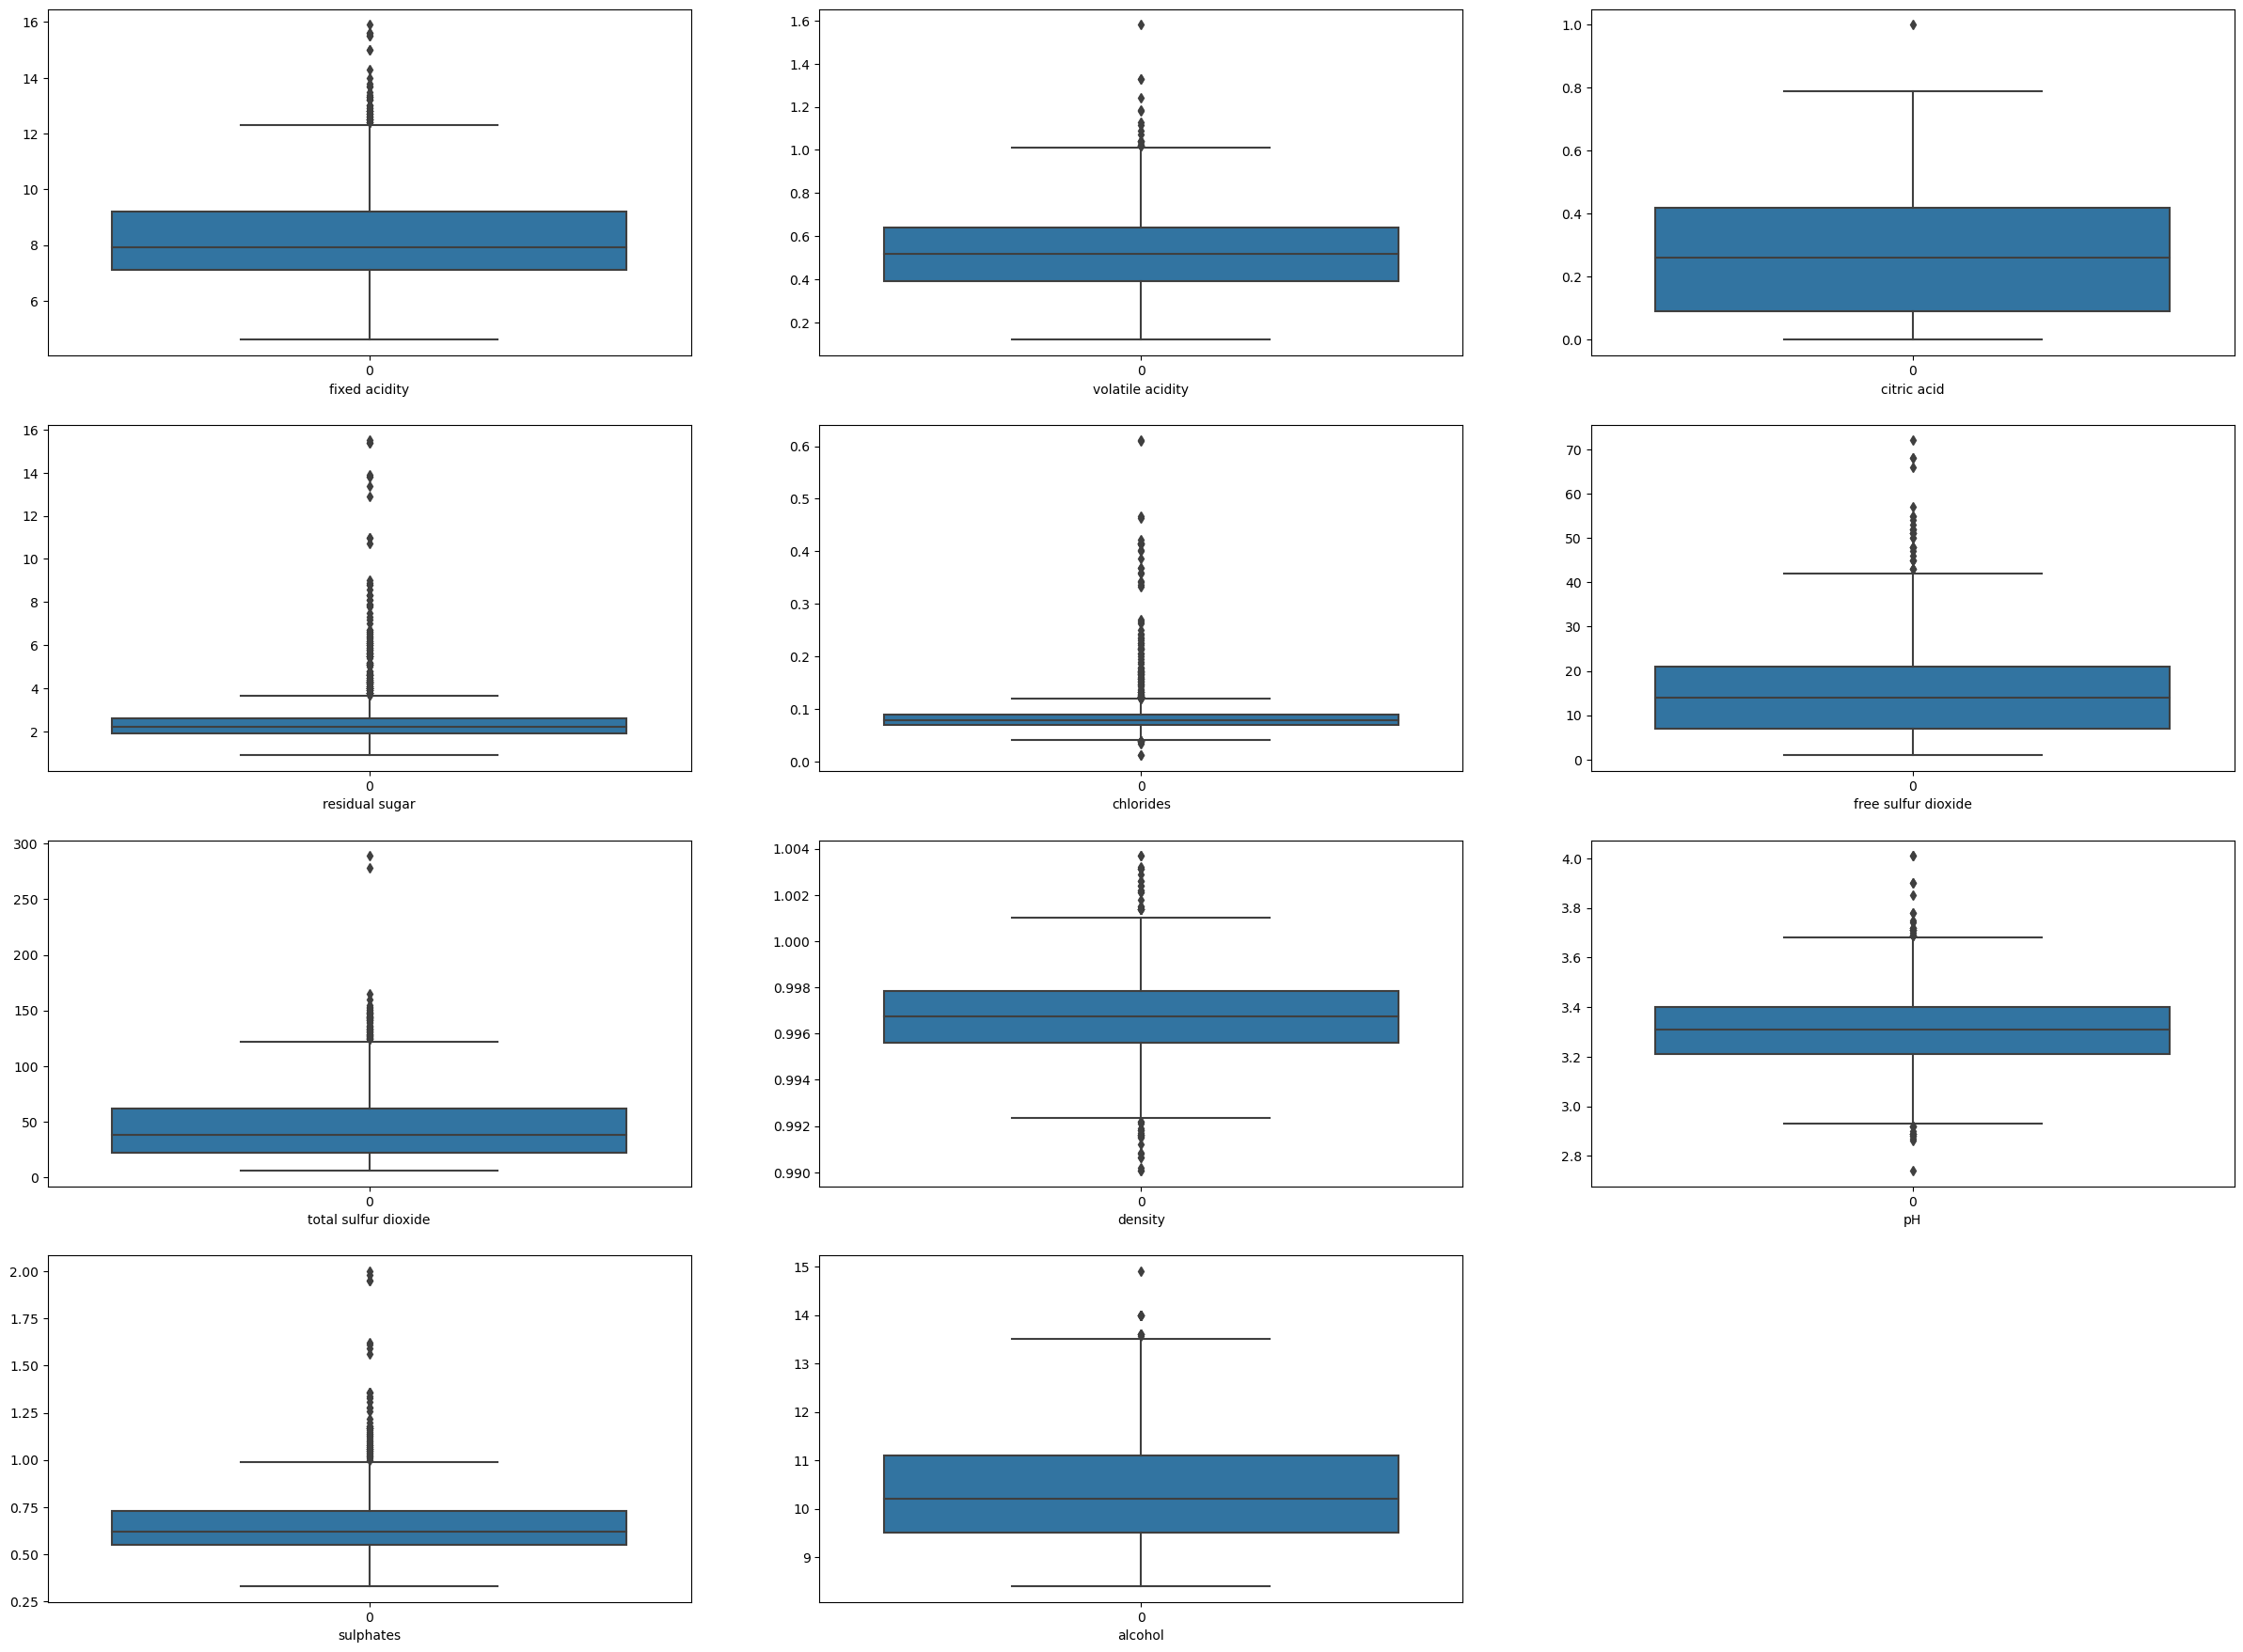

In [13]:
plt.figure(figsize=(30,22))

plotnumber = 1

for column in data:
    if plotnumber<=11:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

as we can see almost every feature has outlier

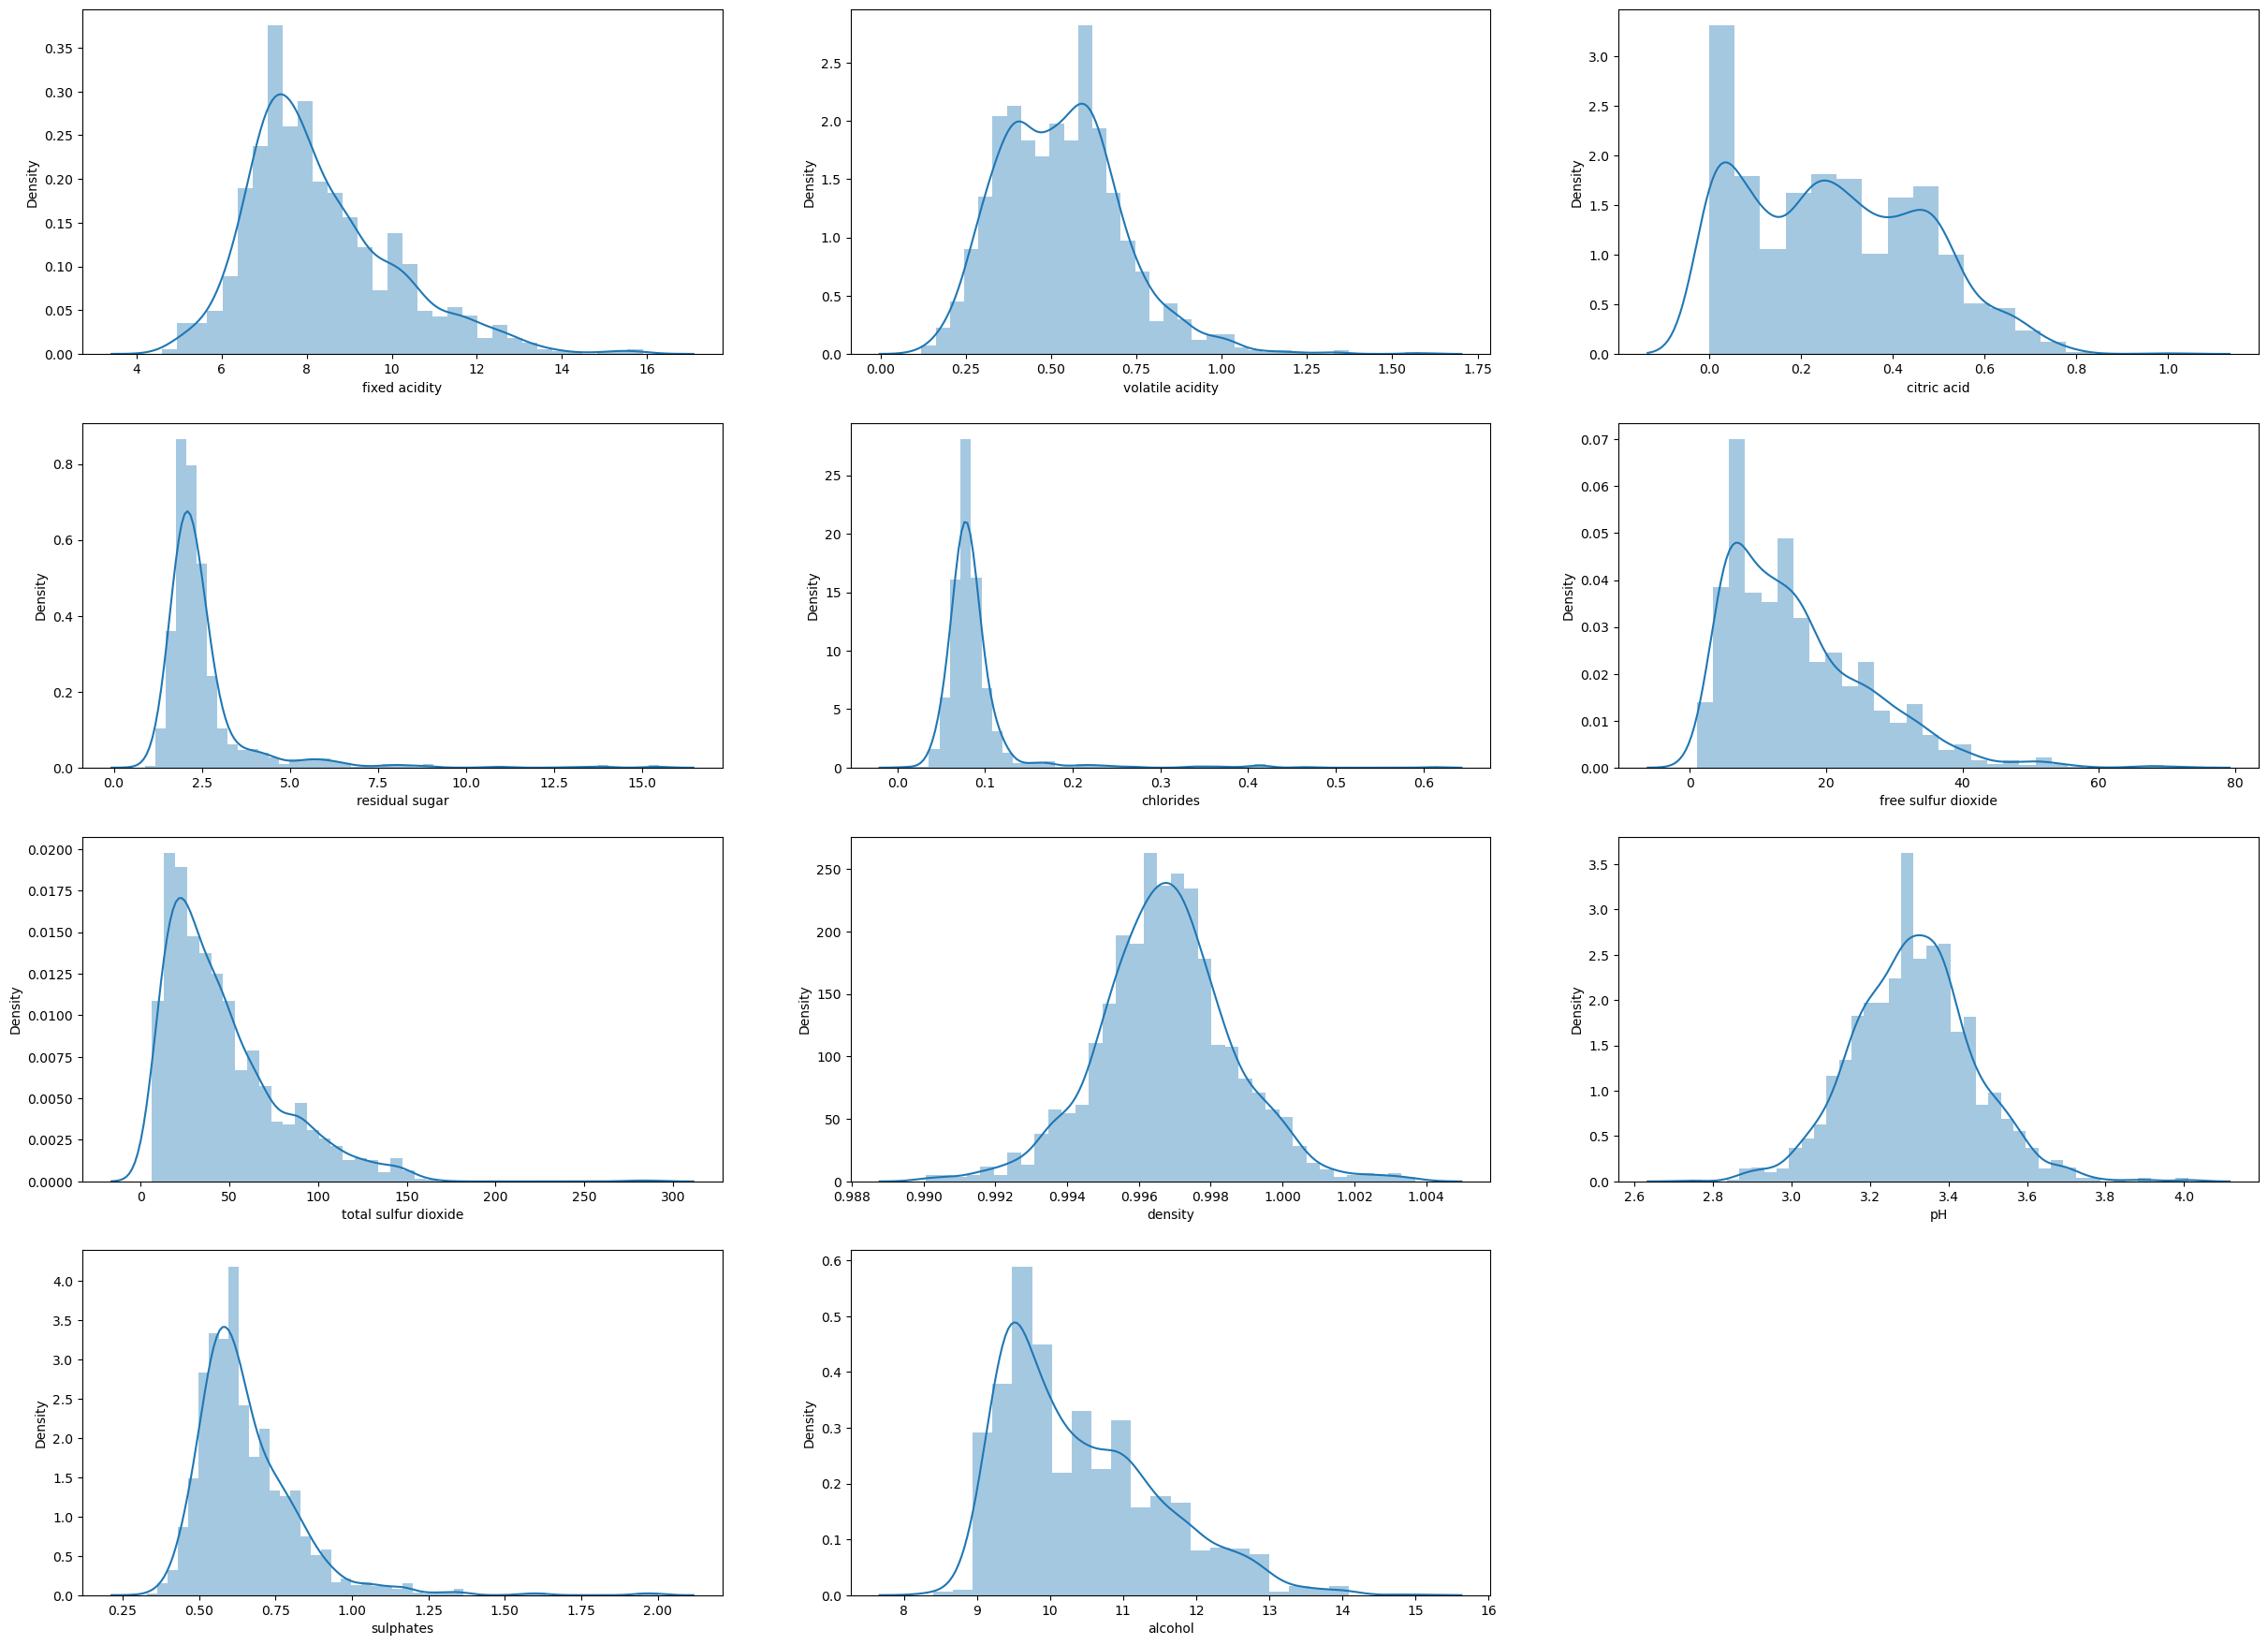

In [14]:
plt.figure(figsize=(30,22))

plotnumber = 1

for column in data:
    if plotnumber<=11:
        plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

data distribution for each label

In [15]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


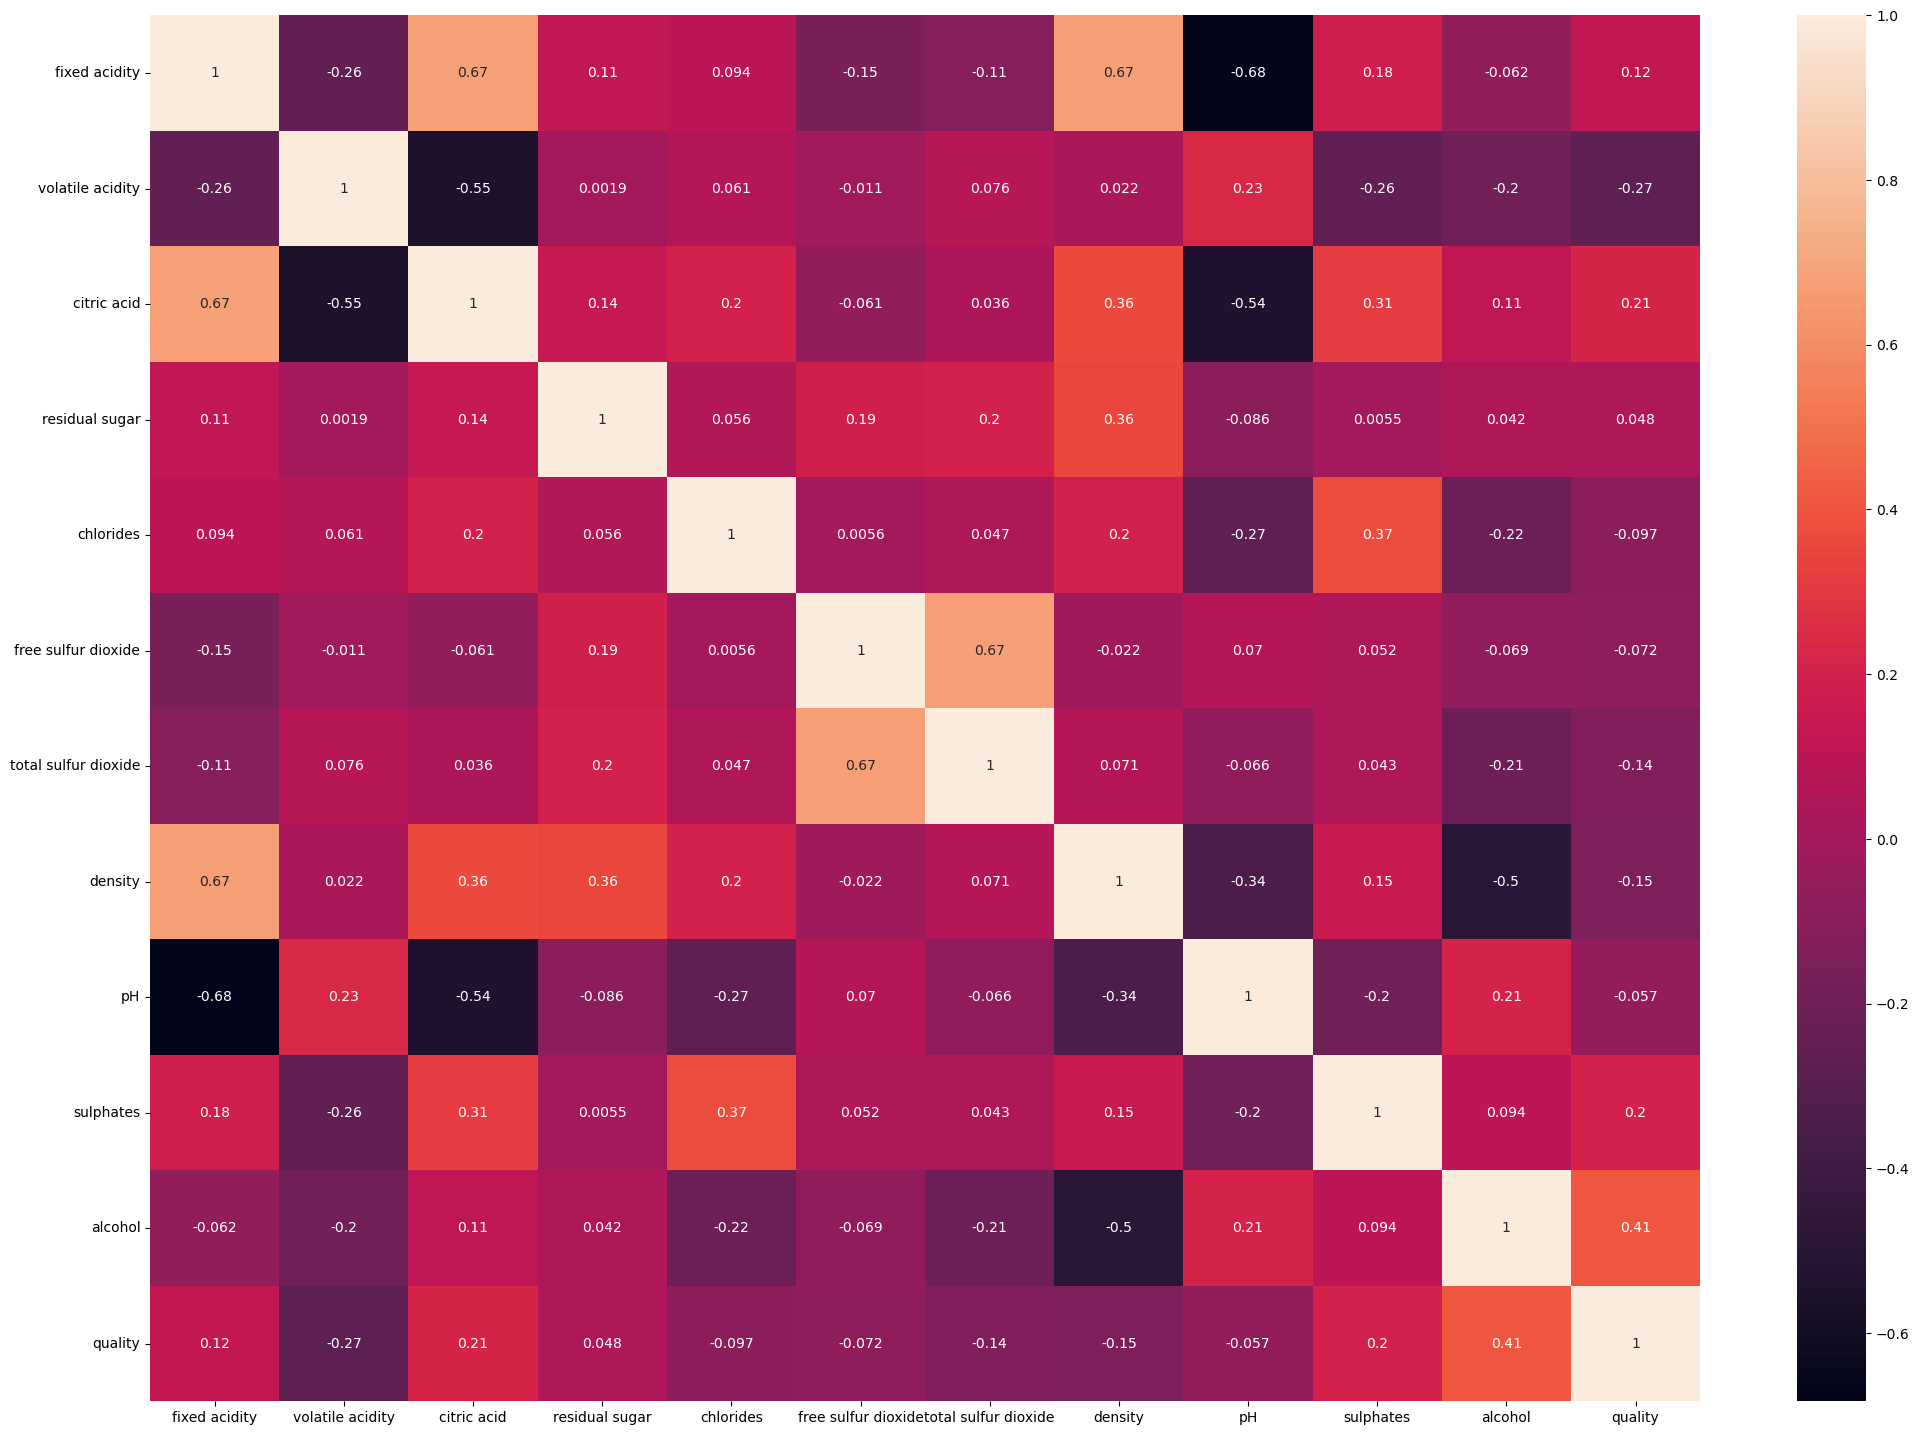

In [16]:
plt.figure(figsize=(25,18))

sns.heatmap(data.corr(),annot=True)

plt.show()

there is no correlation among the features

In [17]:
data.corr()['quality'].sort_values()

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

alcohol has medium relationship with the target while other features have very less realtionship with the target

In [18]:
data.skew().sort_values()

density                 0.071288
pH                      0.193683
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
quality                 2.129363
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [19]:
data.drop(['residual sugar','chlorides','free sulfur dioxide','pH'],axis=1,inplace=True)

removing residual sugar and chlorides from the data set as it has too less connection with target and high skewness

In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,34.0,0.9978,0.56,9.4,0


In [21]:
data.shape

(1599, 8)

In [22]:
from scipy.stats import zscore

In [23]:
x = data.drop('quality',axis=1)

y = data['quality']

In [24]:
z = np.abs(zscore(x))

In [25]:
data = data[(z<3).all(axis=1)]

removing outliers

In [26]:
data.shape

(1517, 8)

In [27]:
data['quality'].value_counts(normalize=True)

0    0.864206
1    0.135794
Name: quality, dtype: float64

data set is not balanced

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mm = MinMaxScaler()

In [30]:
x = mm.fit_transform(x)

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE(sampling_strategy=0.80)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=7)

In [35]:
x_new,y_new = sm.fit_resample(x_train,y_train)

In [36]:
y_new.value_counts()

0    1103
1     882
Name: quality, dtype: int64

now that dataset is balanced we can proceed

# LR

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(x_new,y_new)

LogisticRegression()

In [40]:
pred1 = lr.predict(x_train)

In [41]:
pred2 = lr.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 0.8060985144644254


In [44]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.7875


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cv = cross_val_score(lr,x,y)

cv_mean = cv.mean()

cv_mean

0.862419670846395

In [47]:
confusion_matrix(y_test,pred2)

array([[216,  63],
       [  5,  36]], dtype=int64)

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(x_new,y_new)

KNeighborsClassifier()

In [51]:
pred1 = knn.predict(x_train)

In [52]:
pred2 = knn.predict(x_test)

In [53]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 0.8811571540265832


In [54]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.79375


In [55]:
cv = cross_val_score(knn,x,y)

cv_mean = cv.mean()

cv_mean

0.8474157523510971

In [56]:
confusion_matrix(y_test,pred2)

array([[222,  57],
       [  9,  32]], dtype=int64)

# DT

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier()

In [59]:
dt.fit(x_new,y_new)

DecisionTreeClassifier()

In [60]:
pred1 = dt.predict(x_train)

In [61]:
pred2 = dt.predict(x_test)

In [62]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 1.0


In [63]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.84375


In [64]:
cv = cross_val_score(dt,x,y)

cv_mean = cv.mean()

cv_mean

0.8167476489028213

In [65]:
confusion_matrix(y_test,pred2)

array([[241,  38],
       [ 12,  29]], dtype=int64)

# RF

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(x_new,y_new)

RandomForestClassifier()

In [69]:
pred1 = rf.predict(x_train)

In [70]:
pred2 = rf.predict(x_test)

In [71]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 1.0


In [72]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.890625


In [73]:
cv = cross_val_score(rf,x,y)

cv_mean = cv.mean()

cv_mean

0.8768083855799371

In [74]:
confusion_matrix(y_test,pred2)

array([[254,  25],
       [ 10,  31]], dtype=int64)

# ADA

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ada= AdaBoostClassifier()

In [77]:
ada.fit(x_new,y_new)

AdaBoostClassifier()

In [78]:
pred1 = ada.predict(x_train)

In [79]:
pred2 = ada.predict(x_test)

In [80]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 0.8631743549648163


In [81]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.828125


In [82]:
cv = cross_val_score(ada,x,y)

cv_mean = cv.mean()

cv_mean

0.855542711598746

In [83]:
confusion_matrix(y_test,pred2)

array([[232,  47],
       [  8,  33]], dtype=int64)

# GBDT

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gb = GradientBoostingClassifier()

In [86]:
gb.fit(x_new,y_new)

GradientBoostingClassifier()

In [87]:
pred1 = gb.predict(x_train)

In [88]:
pred2 = gb.predict(x_test)

In [89]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 0.9179046129788898


In [90]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.840625


In [91]:
cv = cross_val_score(gb,x,y)

cv_mean = cv.mean()

cv_mean

0.8630407523510971

In [92]:
confusion_matrix(y_test,pred2)

array([[235,  44],
       [  7,  34]], dtype=int64)

# XGBOOST

In [93]:
from xgboost import XGBClassifier

In [94]:
xg = XGBClassifier()

In [95]:
xg.fit(x_new,y_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
pred1 = xg.predict(x_train)

In [97]:
pred2 = xg.predict(x_test)

In [98]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 1.0


In [99]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.8625


In [100]:
cv = cross_val_score(xg,x,y)

cv_mean = cv.mean()

cv_mean

0.8643025078369906

In [101]:
confusion_matrix(y_test,pred2)

array([[246,  33],
       [ 11,  30]], dtype=int64)

# SVC

In [102]:
from sklearn.svm import SVC

In [103]:
svc = SVC()

In [104]:
svc.fit(x_new,y_new)

SVC()

In [105]:
pred1 = svc.predict(x_train)

In [106]:
pred2 = svc.predict(x_test)

In [107]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 0.8240813135261923


In [108]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.80625


In [109]:
cv = cross_val_score(svc,x,y)

cv_mean = cv.mean()

cv_mean

0.8680485893416927

In [110]:
confusion_matrix(y_test,pred2)

array([[222,  57],
       [  5,  36]], dtype=int64)

# OUT OF ALL THE MODELS RF GIVES THE BEST RESULT

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
para = {"n_estimators":[100,200,10],
       "criterion":["gini", "entropy", "log_loss"],
       "max_depth":[4,5,6,7],
       "min_samples_split":[2,3,4],
       "min_samples_leaf":[2,3],
       "max_features":["sqrt", "log2"]}

In [117]:
rs = RandomizedSearchCV(rf,para,n_jobs=1)

In [118]:
rs.fit(x_new,y_new)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200, 10]})

In [119]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

In [120]:
rs.best_estimator_.fit(x_new,y_new)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=2)

In [121]:
pred1 = rs.best_estimator_.predict(x_train)

In [122]:
pred2 = rs.best_estimator_.predict(x_test)

In [123]:
print(f"Trainning accuracy: {accuracy_score(y_train,pred1)}")

Trainning accuracy: 0.928068803752932


In [124]:
print(f"Test accuracy: {accuracy_score(y_test,pred2)}")

Test accuracy: 0.859375


In [125]:
cv = cross_val_score(rs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.8686735893416927

In [126]:
confusion_matrix(y_test,pred2)

array([[241,  38],
       [  7,  34]], dtype=int64)

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

In [128]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,pred2)

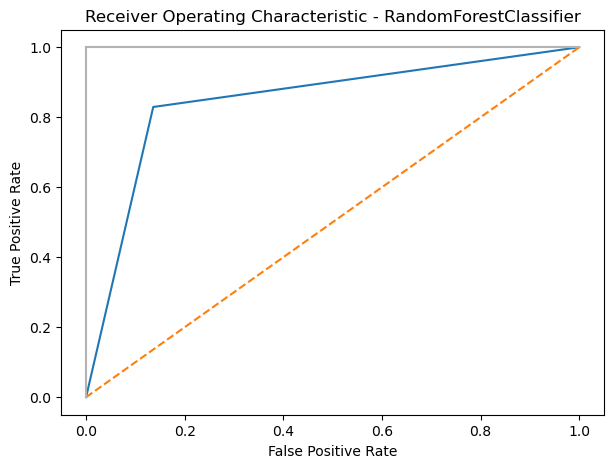

In [129]:
plt.subplots(1, figsize=(7,5))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
